In [0]:
#@markdown ...
%matplotlib inline 
from matplotlib import pyplot as plt

In [0]:
#@markdown ...
plt.rcParams['figure.figsize'] = [18.0, 16.0]
plt.rcParams['font.family'] = 'sans-serif'

## Odczyt danych

In [24]:
#@markdown Pobranie danych z GitHub
import pandas as pd
import numpy as np

%cd /content
!rm -R pigs_data
!git clone -l -s git://github.com/brqd/pigs.git pigs_data > /dev/null
%cd pigs_data

filenames = \
    ["AA_00_W_N_P000_01.txt", "pomiar referencyjny fragmentu ścianki bez wad (grubość nominalna 10 mm)"], \
    ["AA_06_W_C_P000_01.txt", "pomiar ubytku wewnętrznego o głębokości 1,5 mm (15 % grubości nominalnej), z dnem nieregularnym"], \
    ["AA_07_W_C_P000_01.txt", "pomiar ubytku wewnętrznego o głębokości 3,0 mm (30 % grubości nominalnej), z dnem płaskim"], \
    ["AA_08_W_C_P000_01.txt", "pomiar ubytku wewnętrznego o głębokości 4,6 mm (46 % grubości nominalnej), z dnem nieregularnym"], \
    ["AA_09_W_C_P000_01.txt", "pomiar ubytku wewnętrznego o głębokości 5,0 mm (50 % grubości nominalnej), z dnem płaskim"], \
    ["AA_09_Z_C_P000_01.txt", "pomiar ubytku zewnętrznego o głębokości 5,0 mm (50 % grubości nominalnej), z dnem płaskim"], \
    ["AA_10_W_C_P000_01.txt", "pomiar ubytku wewnętrznego o głębokości 5,0 mm (50 % grubości nominalnej), z dnem nieregularnym"]
      
data500 = []
for filename, desc in filenames:
    data500.append([])
    data500[-1] = pd.read_csv(filename, header=[0], sep="\t", skiprows = [1, 2])

/content
Cloning into 'pigs_data'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 19 (delta 6), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (19/19), 1023.06 KiB | 2.56 MiB/s, done.
Resolving deltas: 100% (6/6), done.
/content/pigs_data


## Próbkowanie 500MHz

### Dane i obiednie z uśrednienia modułu

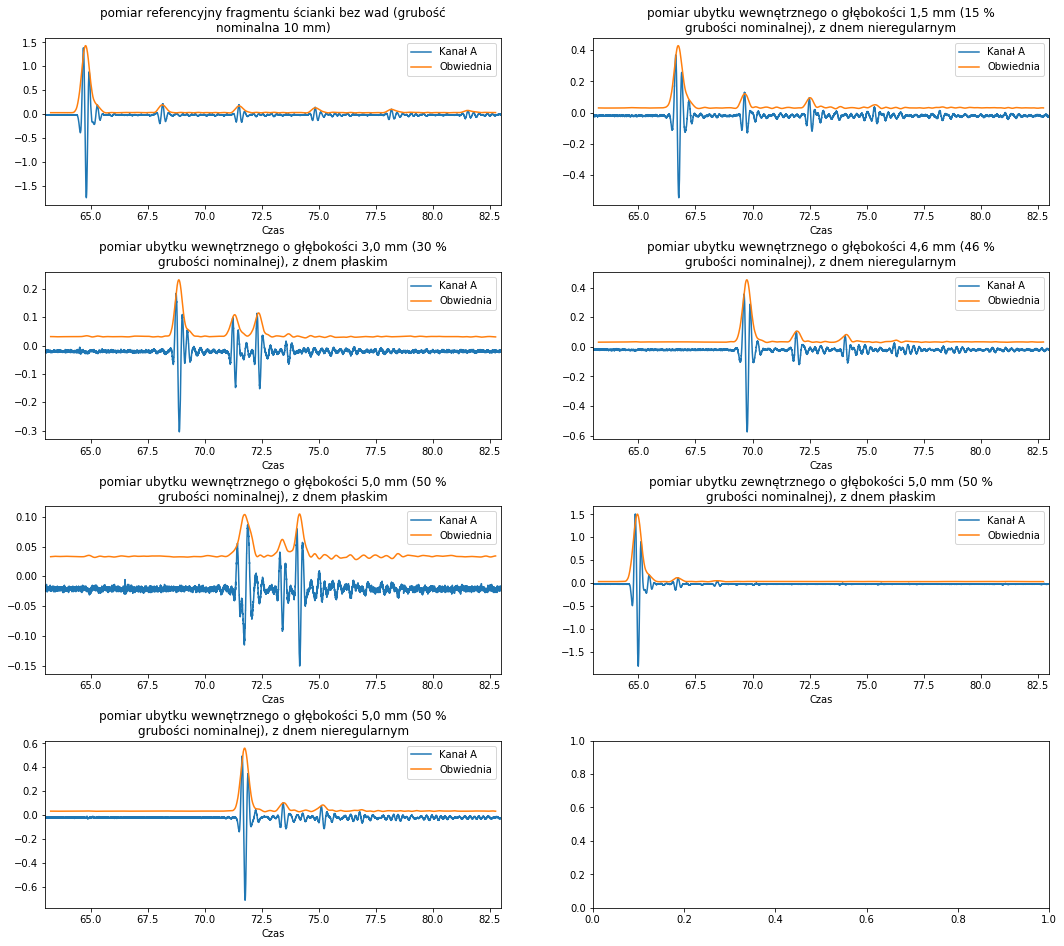

In [25]:
#@markdown Wyznaczenie obwiedni, wykresy
import textwrap

fig1, axs = plt.subplots(4, 2)
plt.subplots_adjust(hspace = 0.4)
axs = [*axs[0], *axs[1], *axs[2], *axs[3]]

for df,[filename,desc],ax in zip(data500, filenames, axs):
    df["Obwiednia"] = df["Kanał A"].abs().rolling(window=256, win_type ='hamming', center=True).mean()*(np.pi/2)
    df.plot(x="Czas", y="Kanał A", ax=ax, title="\n".join(textwrap.wrap(desc, 60)))
    df.plot(x="Czas", y="Obwiednia", ax=ax)
plt.show()

### Szukanie maksimum (trywialne)

In [26]:
#@markdown Wyszukiwanie maksimów
from IPython.display import HTML

def find_max(x):
    return x[len(x)//2] == np.max(x)

for df,[filename, desc] in zip(data500, filenames):
  display(HTML("<BR/><B>Maksima dla: "+desc+"</B>"))
  df['Maks'] = df["Obwiednia"].rolling(window=1024, center=True).apply(find_max, raw=True)
  display(df[df['Maks']==1])


,Czas,Kanał A,Obwiednia,Maks
893,64.782005,-1.246864,1.431773,1.0
2574,68.144005,0.193060,0.191087,1.0
4258,71.512005,0.180792,0.169701,1.0
5021,73.038005,-0.051698,0.036013,1.0
5928,74.852005,0.133244,0.130435,1.0
7596,78.188005,0.095157,0.098593,1.0
9265,81.526004,0.063845,0.075179,1.0


,Czas,Kanał A,Obwiednia,Maks
839,64.674005,-0.021790,0.032383,1.0
1873,66.742005,-0.455458,0.429114,1.0
3334,69.664005,0.118229,0.120966,1.0
4764,72.524005,0.044862,0.095655,1.0
6190,75.376005,0.012207,0.050779,1.0
7667,78.330005,-0.050356,0.036867,1.0
9104,81.204004,-0.043519,0.032970,1.0


,Czas,Kanał A,Obwiednia,Maks
921,64.838005,-0.028565,0.034858,1.0
1991,66.978005,-0.021790,0.033681,1.0
2936,68.868005,-0.273263,0.232450,1.0
4684,72.364005,-0.050356,0.115512,1.0
7284,77.564005,-0.025880,0.033304,1.0
7986,78.968005,-0.025880,0.034098,1.0


,Czas,Kanał A,Obwiednia,Maks
902,64.800005,-0.021790,0.034505,1.0
3377,69.750005,-0.543779,0.452677,1.0
4479,71.954005,0.061159,0.105786,1.0
5558,74.112005,0.000000,0.082776,1.0
6646,76.288005,-0.046266,0.044886,1.0
7755,78.506005,-0.040834,0.036031,1.0
8824,80.644004,-0.035401,0.034121,1.0


,Czas,Kanał A,Obwiednia,Maks
964,64.924005,-0.023133,0.035335,1.0
1674,66.344005,-0.020447,0.034337,1.0
2492,67.980005,-0.023133,0.034283,1.0
4378,71.752005,-0.104678,0.103984,1.0
5581,74.158005,-0.141362,0.104900,1.0
6693,76.382005,-0.033998,0.036169,1.0
7739,78.474005,-0.031312,0.038202,1.0
8906,80.808004,-0.020447,0.035177,1.0


,Czas,Kanał A,Obwiednia,Maks
978,64.952005,-1.063997,1.505172,1.0
1853,66.702005,0.044801,0.117430,1.0
2732,68.460005,0.036683,0.051649,1.0
3484,69.964005,-0.020386,0.038035,1.0
4334,71.664005,-0.021790,0.036097,1.0
5365,73.726005,-0.023133,0.036422,1.0
6226,75.448005,-0.025819,0.035583,1.0
7069,77.134005,-0.023133,0.034542,1.0
7919,78.834005,-0.021790,0.035777,1.0
9151,81.298004,-0.020386,0.036444,1.0


,Czas,Kanał A,Obwiednia,Maks
941,64.878005,-0.032655,0.034314,1.0
2673,68.342005,-0.019044,0.034235,1.0
4378,71.752005,-0.632038,0.559960,1.0
5236,73.468005,0.067934,0.103063,1.0
6092,75.180005,-0.031312,0.084473,1.0
6940,76.876005,-0.050294,0.044890,1.0
8143,79.282005,-0.024476,0.037530,1.0


## Próbkowanie 50MHz

### Dane i obwiednie z uśrednienia modułu

In [0]:
#@markdown Resamplowanie danych
data50 = []
for tmp in data500:
    data50.append(tmp[::10].copy())

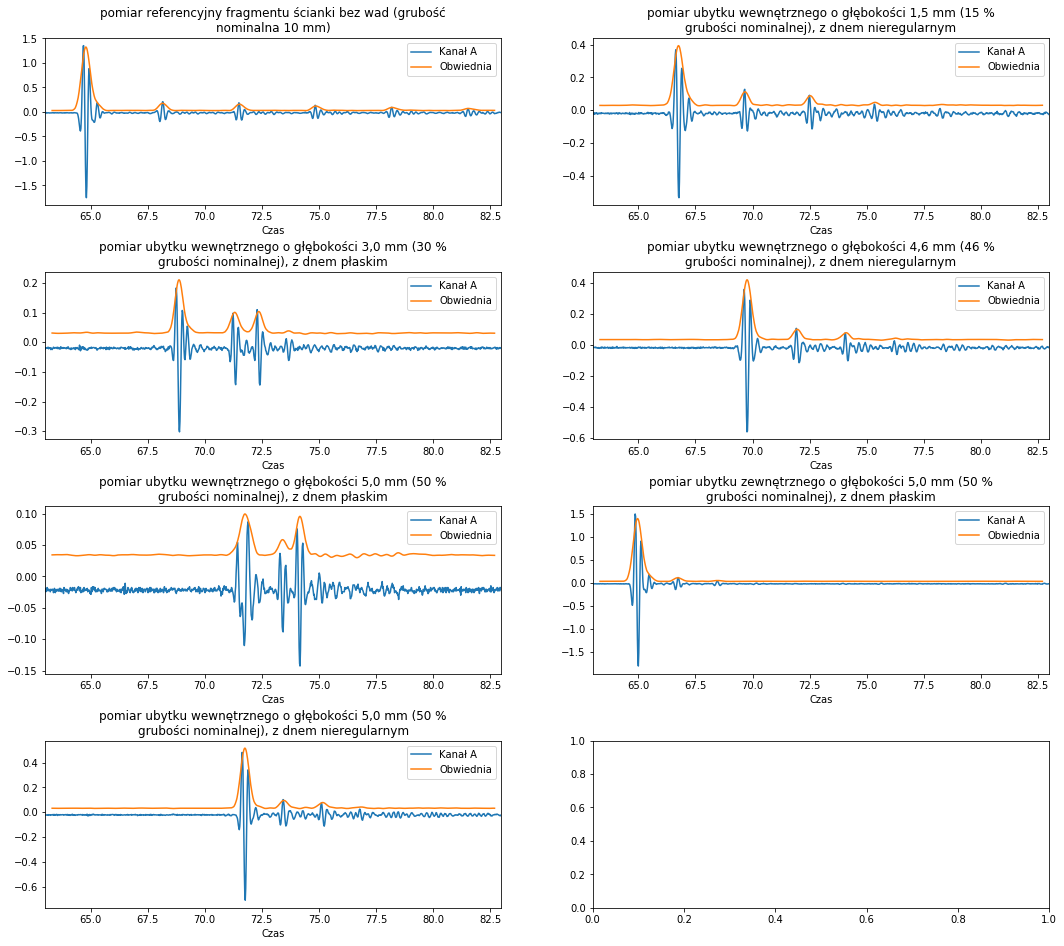

In [28]:
#@markdown Wyznaczenie obwiedni, wykresy
import textwrap

fig1, axs = plt.subplots(4, 2)
plt.subplots_adjust(hspace = 0.4)
axs = [*axs[0], *axs[1], *axs[2], *axs[3]]

for df,[filename,desc],ax in zip(data50, filenames, axs):
    df["Obwiednia"] = df["Kanał A"].abs().rolling(window=32, win_type ='hamming', center=True).mean()*(np.pi/2)
    df.plot(x="Czas", y="Kanał A", ax=ax, title="\n".join(textwrap.wrap(desc, 60)))
    df.plot(x="Czas", y="Obwiednia", ax=ax)
plt.show()

### Szukanie maksimum (trywialne)

In [29]:
#@markdown Wyszukiwanie maksimów
from IPython.display import HTML

def find_max(x):
    return x[len(x)//2] == np.max(x)

for df,[filename, desc] in zip(data50, filenames):
  display(HTML("<BR/><B>Maksima dla: "+desc+"</B>"))
  df['Maks'] = df["Obwiednia"].rolling(window=128, center=True).apply(find_max, raw=True)
  display(df[df['Maks']==1])

,Czas,Kanał A,Obwiednia,Maks
900,64.796005,-1.580004,1.324548,1.0
2580,68.156005,0.209357,0.177376,1.0
4260,71.516005,0.175359,0.158671,1.0
5930,74.856005,0.130497,0.120839,1.0
7600,78.196005,0.093814,0.091753,1.0


,Czas,Kanał A,Obwiednia,Maks
870,64.736005,-0.020447,0.032453,1.0
1880,66.756005,-0.523454,0.393942,1.0
3340,69.676005,0.095157,0.112567,1.0
4770,72.536005,0.018983,0.088741,1.0
6180,75.356005,0.029908,0.048236,1.0
7650,78.296005,-0.036744,0.035381,1.0


,Czas,Kanał A,Obwiednia,Maks
910,64.816005,-0.025880,0.033812,1.0
2000,66.996005,-0.021790,0.034544,1.0
2940,68.876005,-0.293649,0.210649,1.0
4690,72.376005,-0.087039,0.103737,1.0
6260,75.516005,-0.032655,0.032548,1.0
7970,78.936005,-0.021790,0.032664,1.0
9020,81.036004,-0.020447,0.032434,1.0


,Czas,Kanał A,Obwiednia,Maks
2060,67.116005,-0.020447,0.033502,1.0
3380,69.756005,-0.562822,0.417523,1.0
4480,71.956005,0.057070,0.098564,1.0
5550,74.096005,0.032594,0.076426,1.0
6640,76.276005,-0.031312,0.041444,1.0
7760,78.516005,-0.035401,0.033536,1.0
8540,80.076005,-0.023133,0.033082,1.0


,Czas,Kanał A,Obwiednia,Maks
2520,68.036005,-0.024476,0.035391,1.0
4380,71.756005,-0.101993,0.099499,1.0
5590,74.176005,-0.142766,0.095672,1.0
7000,76.996005,-0.028565,0.036046,1.0
7740,78.476005,-0.029908,0.037689,1.0


,Czas,Kanał A,Obwiednia,Maks
980,64.956005,-1.195837,1.390414,1.0
2730,68.456005,0.038026,0.050614,1.0
4600,72.196005,-0.025819,0.035460,1.0
5330,73.656005,-0.019044,0.035250,1.0
6200,75.396005,-0.023133,0.034709,1.0
7800,78.596005,-0.024476,0.034320,1.0
9190,81.376004,-0.017701,0.035688,1.0


,Czas,Kanał A,Obwiednia,Maks
930,64.856005,-0.016358,0.033691,1.0
2610,68.216005,-0.023133,0.034472,1.0
4380,71.756005,-0.656514,0.515775,1.0
5230,73.456005,0.085574,0.095512,1.0
6090,75.176005,-0.027223,0.078545,1.0
6930,76.856005,-0.031312,0.042566,1.0
8160,79.316005,-0.023133,0.035615,1.0
8970,80.936004,-0.025880,0.035464,1.0


## Próbkowanie 50MHz próbkowanie obwiedni 5MHz

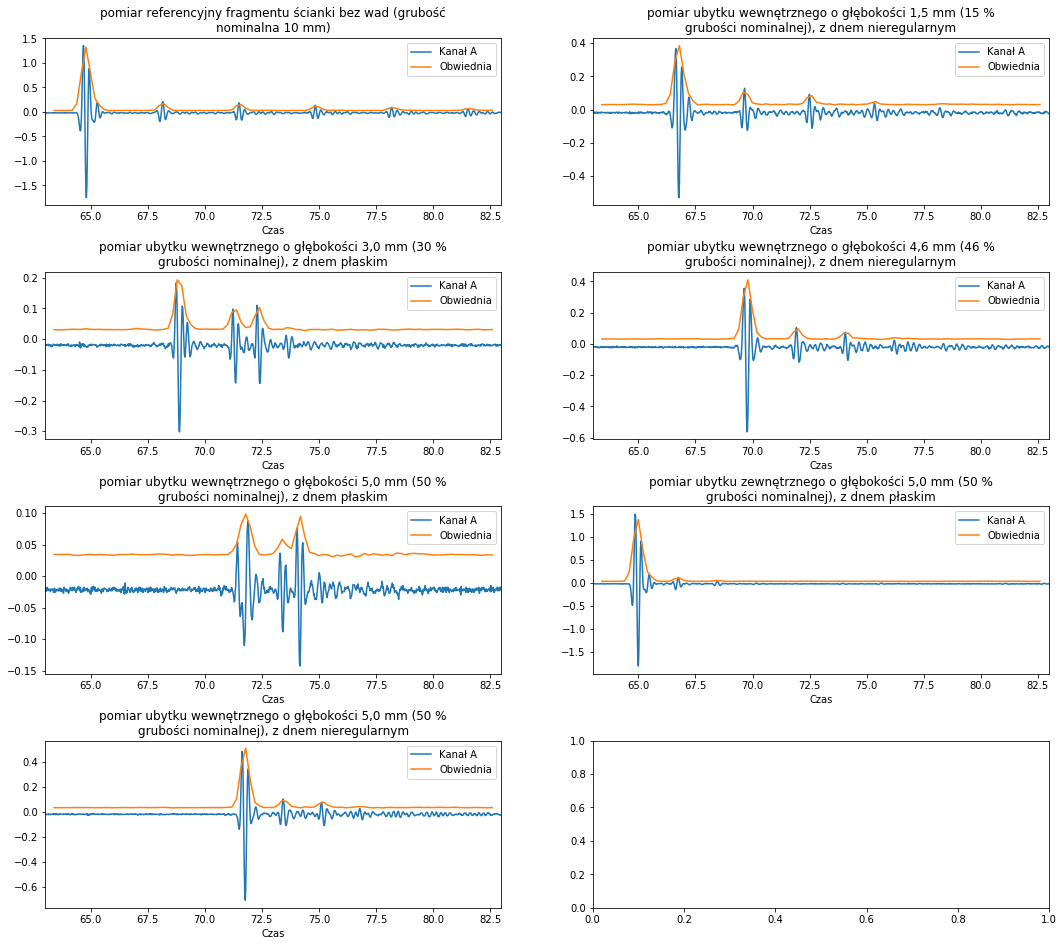

In [35]:
#@markdown Wykresy
import textwrap

fig1, axs = plt.subplots(4, 2)
plt.subplots_adjust(hspace = 0.4)
axs = [*axs[0], *axs[1], *axs[2], *axs[3]]

for df,[filename,desc],ax in zip(data50, filenames, axs):
    df.plot(x="Czas", y="Kanał A", ax=ax, title="\n".join(textwrap.wrap(desc, 60)))
    df[::10].plot(x="Czas", y="Obwiednia", ax=ax)
plt.show()

In [40]:
#@markdown Wyszukiwanie maksimów
from IPython.display import HTML

def find_max(x):
    return x[len(x)//2] == np.max(x)

for df,[filename, desc] in zip(data50, filenames):
  display(HTML("<BR/><B>Maksima dla: "+desc+"</B>"))
  df5 = df[::10].copy()
  df5['Maks'] = df5["Obwiednia"].rolling(window=8, center=True).apply(find_max, raw=True)
  display(df5[df5['Maks']==1])

,Czas,Kanał A,Obwiednia,Maks
900,64.796005,-1.580004,1.324548,1.0
2600,68.196005,0.142766,0.174038,1.0
4300,71.596005,-0.138737,0.149019,1.0
5000,72.996005,-0.035401,0.032975,1.0
5900,74.796005,0.035340,0.114247,1.0
7600,78.196005,0.093814,0.091753,1.0
9300,81.596004,-0.012268,0.070230,1.0


,Czas,Kanał A,Obwiednia,Maks
900,64.796005,-0.020447,0.032329,1.0
1900,66.796005,-0.437818,0.386005,1.0
3300,69.596005,0.017640,0.105291,1.0
4800,72.596005,-0.112857,0.083496,1.0
6200,75.396005,-0.013611,0.047844,1.0
6900,76.796005,-0.017701,0.032086,1.0
7700,78.396005,-0.020447,0.034691,1.0
8300,79.596005,-0.021790,0.032589,1.0
9300,81.596004,-0.021790,0.031174,1.0


,Czas,Kanał A,Obwiednia,Maks
900,64.796005,-0.023133,0.033777,1.0
2000,66.996005,-0.021790,0.034544,1.0
2900,68.796005,0.081545,0.192988,1.0
4200,71.396005,-0.077517,0.094536,1.0
4700,72.396005,-0.137333,0.102809,1.0
5300,73.596005,0.000000,0.037184,1.0
6300,75.596005,-0.020447,0.032095,1.0
7300,77.596005,-0.032655,0.032089,1.0
8000,78.996005,-0.023133,0.032565,1.0
9000,80.996004,-0.019044,0.032335,1.0


,Czas,Kanał A,Obwiednia,Maks
900,64.796005,-0.019044,0.032630,1.0
1500,65.996005,-0.020447,0.033153,1.0
2100,67.196005,-0.021790,0.033308,1.0
3400,69.796005,-0.454054,0.410720,1.0
4500,71.996005,-0.046266,0.096655,1.0
5600,74.196005,-0.096561,0.069190,1.0
6600,76.196005,0.020386,0.040201,1.0
7800,78.596005,-0.013611,0.033018,1.0
8400,79.796005,-0.024476,0.033079,1.0


,Czas,Kanał A,Obwiednia,Maks
1000,64.996005,-0.024476,0.034574,1.0
1900,66.796005,-0.017701,0.034844,1.0
2500,67.996005,-0.024476,0.035390,1.0
3600,70.196005,-0.023133,0.034444,1.0
4400,71.796005,-0.044862,0.098797,1.0
5600,74.196005,-0.116947,0.095013,1.0
7000,76.996005,-0.028565,0.036046,1.0
7700,78.396005,-0.024476,0.036631,1.0
8900,80.796004,-0.023133,0.034870,1.0


,Czas,Kanał A,Obwiednia,Maks
1000,64.996005,-1.800531,1.371421,1.0
1900,66.796005,0.018983,0.103663,1.0
2700,68.396005,-0.012268,0.049414,1.0
3500,69.996005,-0.028565,0.035863,1.0
4600,72.196005,-0.025819,0.035460,1.0
5300,73.596005,-0.024476,0.035087,1.0
6200,75.396005,-0.023133,0.034709,1.0
7800,78.596005,-0.024476,0.034320,1.0
8700,80.396005,-0.024476,0.034862,1.0
9200,81.396004,-0.021790,0.035633,1.0


,Czas,Kanał A,Obwiednia,Maks
900,64.796005,-0.020447,0.033426,1.0
1700,66.396005,-0.023133,0.033439,1.0
2100,67.196005,-0.017701,0.034035,1.0
2600,68.196005,-0.021790,0.034447,1.0
4400,71.796005,-0.611652,0.507356,1.0
5200,73.396005,0.046205,0.090440,1.0
6100,75.196005,-0.072085,0.078023,1.0
6900,76.796005,0.025819,0.041773,1.0
7500,77.996005,-0.027223,0.033953,1.0
8200,79.396005,-0.027223,0.034790,1.0


## Próbkowanie 5MHz

### Dane i obwiednie z uśrednienia modułu

In [0]:
#@markdown Resampling
data5 = []
for tmp in data500:
    data5.append(tmp[::100].copy())

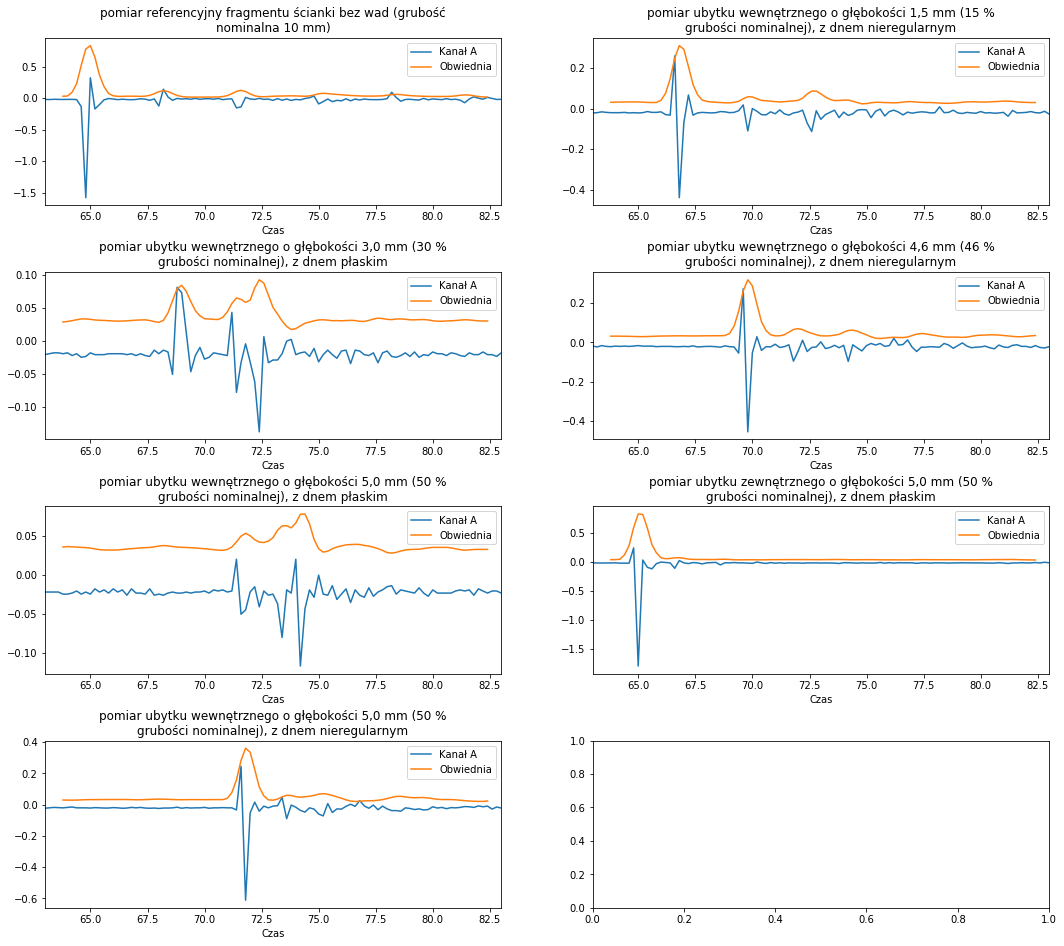

In [18]:
#@markdown Wyznaczenie obwiedni, wykresy
import textwrap

fig1, axs = plt.subplots(4, 2)
plt.subplots_adjust(hspace = 0.4)
axs = [*axs[0], *axs[1], *axs[2], *axs[3]]

for df,[filename,desc],ax in zip(data5, filenames, axs):
    df["Obwiednia"] = df["Kanał A"].abs().rolling(window=8, win_type ='hamming', center=True).mean()*(np.pi/2)
    df.plot(x="Czas", y="Kanał A", ax=ax, title="\n".join(textwrap.wrap(desc, 60)))
    df.plot(x="Czas", y="Obwiednia", ax=ax)
plt.show()

### Szukanie maksimum (trywialne)

In [11]:
#@markdown Szukanie maksimów
from IPython.display import HTML

def find_max(x):
    return x[len(x)//2] == np.max(x)

for df,[filename, desc] in zip(data5, filenames):
  display(HTML("<BR/><B>Maksima dla: "+desc+"</B>"))
  df['Maks'] = df["Obwiednia"].rolling(window=16, center=True).apply(find_max, raw=True)
  display(df[df['Maks']==1])

,Czas,Kanał A,Obwiednia,Maks
2600,68.196005,0.142766,0.118975,1.0
4300,71.596005,-0.138737,0.123667,1.0
6100,75.196005,-0.054445,0.076931,1.0
7700,78.396005,0.010865,0.060784,1.0


,Czas,Kanał A,Obwiednia,Maks
1900,66.796005,-0.437818,0.308561,1.0
3400,69.796005,-0.110172,0.057504,1.0
4900,72.796005,-0.010926,0.085562,1.0
6900,76.796005,-0.017701,0.033537,1.0
9000,80.996004,-0.019044,0.036370,1.0


,Czas,Kanał A,Obwiednia,Maks
3000,68.996005,0.073366,0.084479,1.0
4700,72.396005,-0.137333,0.092854,1.0
6100,75.196005,-0.020447,0.032383,1.0
7300,77.596005,-0.032655,0.034769,1.0


,Czas,Kanał A,Obwiednia,Maks
3400,69.796005,-0.454054,0.317388,1.0
5700,74.396005,-0.012268,0.061954,1.0
7200,77.396005,-0.024476,0.044884,1.0
8800,80.596005,-0.032655,0.038199,1.0


,Czas,Kanał A,Obwiednia,Maks
2600,68.196005,-0.025880,0.037989,1.0
5700,74.396005,-0.043519,0.078580,1.0
6800,76.596005,-0.019044,0.039532,1.0
8500,79.996005,-0.019044,0.035639,1.0
8800,80.596005,-0.023133,0.035639,1.0


,Czas,Kanał A,Obwiednia,Maks
5400,73.796005,-0.031312,0.037874,1.0
7200,77.396005,-0.020386,0.035439,1.0


,Czas,Kanał A,Obwiednia,Maks
2500,67.996005,-0.024476,0.035445,1.0
4400,71.796005,-0.611652,0.361684,1.0
6100,75.196005,-0.072085,0.070194,1.0
7800,78.596005,-0.042177,0.053132,1.0
